### Smile On EDA

#### For this analysis we want to answer the following questions: 
-  Has the Smile On program been effective?
-  Is the Smile On program being used by people in the area where tooth loss is greatest?

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's read in the data and look at the first few rows

In [2]:
smile = pd.read_csv('data/smile_on.csv', sep=',', encoding='latin-1', skiprows = 2)
smile.head()

C:\Users\sbive\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32,36,53,59,88,89,127,141,144,156,157,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes


In [3]:
smile.shape

(40032, 184)

In [4]:
smile.info

<bound method DataFrame.info of        CallReportNum              ReportVersion  LinkedToCallReportNum  \
0           81381827  SMILE ON 60+ Registration                    NaN   
1           81379177  SMILE ON 60+ Registration                    NaN   
2           81377435      SMILE ON 60+ Clinical                    NaN   
3           81375215      SMILE ON 60+ Clinical                    NaN   
4           81373934      SMILE ON 60+ Clinical                    NaN   
...              ...                        ...                    ...   
40027       53192452  SMILE ON 60+ Registration                    NaN   
40028       67915561  SMILE ON 60+ Registration                    NaN   
40029       67251405      SMILE ON 60+ Clinical                    NaN   
40030       63063150      SMILE ON 60+ Clinical                    NaN   
40031       70839903      SMILE ON 60+ Clinical                    NaN   

      CallDateAndTimeStart CallDateAndTimeEnd  CallLength  CallerNum  \
0      

In [5]:
smile.CallerNum.value_counts()

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: CallerNum, Length: 8708, dtype: int64

In [6]:
smile.CityName.value_counts().head(10)

Nashville       6456
Memphis         6304
Murfreesboro    2435
Cleveland       1718
Knoxville       1461
Kingsport       1219
Antioch          976
Madison          733
Johnson City     704
Smyrna           650
Name: CityName, dtype: int64

In [7]:
smile['Birth Year'].value_counts().head(10)

1958    2182
1957    2046
1956    2036
1955    1841
1954    1670
1956    1493
1955    1444
1958    1364
1957    1354
1953    1286
Name: Birth Year, dtype: int64

In [8]:
smile['SMILE ON 60+ Site Information - Enroller ID'].value_counts().head(10)

Interfaith Dental Clinic - Nashville                           5802
Interfaith Dental Clinic - Murfreesboro                        3706
Church Health Center - Memphis                                 3581
Matthew Walker Comprehensive Health Center Inc. - Nashville    2516
Interfaith Health Clinic of Knoxville - Knoxville              1822
Karis Dental Clinic - Cleveland                                1809
Friends in Need Health Center - Kingsport                      1566
Healing Hands Health Center - Bristol                          1346
Keystone Dental Care Inc. - Johnson City                       1032
Christ Community Health Services- Hickory Hill                  986
Name: SMILE ON 60+ Site Information - Enroller ID, dtype: int64

In [9]:
smile['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'].value_counts().head(10)

Yes    15930
No      1098
Name: SMILE ON 60+ Treatment Plan - Was a treatment plan developed?, dtype: int64

In [10]:
smile['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'].value_counts().head(10)

No     12431
Yes     5104
Name: SMILE ON 60+ Treatment Plan - Is the treatment plan completed?, dtype: int64

In [11]:
smile['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts().head(10)

No     8127
Yes    6149
Name: SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

In [12]:
smile['SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?'].value_counts().head(10)

Dental Clinic Staff                  22805
Other                                 5725
This encounter                        2488
Wisdom Tooth Project Presentation     1988
SMILE ON CDHC                         1438
Senior Center                         1431
TV                                     983
Flyer                                  511
Newspaper                              258
Dental Hotline                         145
Name: SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?, dtype: int64

In [13]:
smile['SMILE ON 60+ Verification of Eligibility - Transportation Arranged'].value_counts().head(10)

No     5483
Yes     342
Name: SMILE ON 60+ Verification of Eligibility - Transportation Arranged, dtype: int64

In [14]:
smile['SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?'].value_counts().head(10)

Less than 12 months    16751
More than 5 years       8533
1 to 2 years            7077
3 to 5 years            4863
Name: SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?, dtype: int64

## ideas

#### how many clinical visits were there for patients who hadn't seen the dentist in each time frame?
- create oldest and newest records and compare need for dental assistance
- did they complete the program?
- what were the barriers faced by each patient?
- what type of dental procedures were performed?

In [15]:
#sort by CallDateAndTimeStart to get in chronological order
smile['CallDateAndTimeStart'] =  pd.to_datetime(smile['CallDateAndTimeStart'], format='%m/%d/%Y %H:%M')

smile.sort_values('CallDateAndTimeStart', inplace=True)
smile.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
40031,70839903,SMILE ON 60+ Clinical,NaN,2018-02-14 08:10:00,2/14/2018 8:18,8,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40030,63063150,SMILE ON 60+ Clinical,NaN,2018-05-01 08:14:00,5/1/2018 8:24,10,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40029,67251405,SMILE ON 60+ Clinical,NaN,2018-05-10 08:25:00,5/10/2018 8:26,1,2631417,131347,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,Not available,No,Yes,Yes,NaN,NaN
40028,67915561,SMILE ON 60+ Registration,NaN,2018-05-15 09:06:00,5/15/2018 9:10,4,3239813,128174,NaN,NaN,...,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40027,53192452,SMILE ON 60+ Registration,NaN,2018-05-23 14:11:00,5/23/2018 14:11,0,-1,60132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#sort by CallDateAndTimeStart column 
first = smile.sort_values('CallDateAndTimeStart')

#create a dataframe of all of the first calls
first.drop_duplicates(subset = 'CallerNum', keep = 'first', inplace = True)

first = first.sort_values('CallerNum')
first.head(10)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
40023,53396598,SMILE ON 60+ Clinical,NaN,2018-05-31 14:26:00,5/31/2018 14:27,1,-2,116749,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40031,70839903,SMILE ON 60+ Clinical,NaN,2018-02-14 08:10:00,2/14/2018 8:18,8,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,80389848,SMILE ON 60+ Clinical,NaN,2020-10-30 11:39:00,10/30/2020 11:39,0,2061444,60132,NaN,NaN,...,NaN,NaN,Church Health Center - Memphis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40021,53601932,SMILE ON 60+ Clinical,NaN,2018-06-08 08:14:00,6/8/2018 8:21,7,2307186,116749,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Interfaith Dental Clinic - Murfreesboro,Senior Center,NaN,NaN,NaN,NaN,Yes,Yes
40007,55628771,SMILE ON 60+ Clinical,NaN,2018-08-01 08:53:00,8/1/2018 8:54,1,2384106,118821,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40010,55104302,SMILE ON 60+ Registration,NaN,2018-08-01 08:18:00,8/1/2018 9:43,85,2384744,118820,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40006,55105444,SMILE ON 60+ Registration,NaN,2018-08-01 09:06:00,8/1/2018 9:14,8,2384833,118820,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40003,55106455,SMILE ON 60+ Registration,NaN,2018-08-01 09:42:00,8/1/2018 9:47,5,2384897,118833,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40001,55106622,SMILE ON 60+ Registration,NaN,2018-08-01 09:48:00,8/1/2018 9:59,11,2384922,118833,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40008,55628539,SMILE ON 60+ Clinical,NaN,2018-08-01 08:44:00,8/1/2018 8:46,2,2384932,118821,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# How many patients does Smile On have in each city?
first.CityName.value_counts().head(10)

Memphis         1422
Nashville       1135
Murfreesboro     405
Knoxville        386
Cleveland        272
Kingsport        229
Johnson City     179
Antioch          171
Bristol          160
Madison          156
Name: CityName, dtype: int64

In [18]:
first.to_csv(r'first_record_for_each_patient.csv', index = True)

In [19]:
# Check for how many rows should be in the dataframe with first and last calls
print('the new data frame of all of the first and last calls should have '+str(6678+8708)+' rows')

the new data frame of all of the first and last calls should have 15386 rows


In [20]:
#sort by CallDateAndTimeStart column 
last = smile.sort_values('CallDateAndTimeStart')
last = last[last.duplicated('CallerNum')]

#create a dataframe of all of the last calls
last.drop_duplicates(subset = 'CallerNum', keep = 'last', inplace = True)

last = last.sort_values('CallerNum')
last.head(10)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
29702,62945363,SMILE ON 60+ Clinical,NaN,2019-05-15 10:00:00,5/15/2019 11:00,60,-2,119473,NaN,NaN,...,NaN,NaN,Healing Hands Health Center - Bristol,NaN,NaN,NaN,Yes,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,2020-11-25 13:50:00,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes
14355,70281146,SMILE ON 60+ Clinical,NaN,2020-01-20 13:25:00,1/20/2020 13:25,0,2384106,134549,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,Yes,Yes,Yes,NaN,NaN
6260,76706676,SMILE ON 60+ Clinical,NaN,2020-07-15 10:41:00,7/15/2020 10:42,1,2384744,134549,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,Yes,Yes,Yes,NaN,NaN
36372,58618079,SMILE ON 60+ Clinical,NaN,2018-11-29 11:05:00,11/29/2018 11:05,0,2384833,118821,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,Yes,Yes,Yes,NaN,NaN
39900,55263902,SMILE ON 60+ Clinical,NaN,2018-08-07 10:49:00,8/7/2018 10:50,1,2384922,116749,NaN,NaN,...,No obvious problem,No,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes
8029,75035660,SMILE ON 60+ Registration,NaN,2020-06-08 10:34:00,6/8/2020 10:35,1,2384932,123747,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6061,76920322,SMILE ON 60+ Clinical,NaN,2020-07-20 13:20:00,7/20/2020 13:22,2,2384949,134549,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,Yes,Yes,Yes,NaN,NaN
37357,57594788,SMILE ON 60+ Clinical,NaN,2018-10-31 10:50:00,10/31/2018 10:50,0,2384963,118821,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,No,Yes,Yes,NaN,NaN
35385,60176754,SMILE ON 60+ Clinical,NaN,2019-01-02 17:56:00,1/2/2019 17:57,1,2384971,118821,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,Yes,Yes,Yes,NaN,NaN


In [21]:
# Group by zip code and count how many patients are in each one
zip_grouped = first.groupby(['PostalCode'])

zip_counts = zip_grouped.count()['CallReportNum']
                        

#zip_counts = zip_counts.PostalCode.astype(float)
zip_counts.head()

PostalCode
24201.0    2
24202.0    8
24245.0    1
24248.0    2
24301.0    1
Name: CallReportNum, dtype: int64

In [22]:
# Convert to a data frame
zip_counts = zip_counts.to_frame()
zip_counts.head()

,CallReportNum
PostalCode,
24201.0,2
24202.0,8
24245.0,1
24248.0,2
24301.0,1


In [23]:
import geopandas as gpd

In [24]:
zipcodes = gpd.read_file('data/tn_zipcodes.json')

In [25]:
zipcodes.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,47,37710,4737710,B5,G6350,S,211712025,0,+36.1586321,-084.3161341,N,"POLYGON ((-84.27434 36.13099, -84.27447 36.130..."
1,47,37381,4737381,B5,G6350,S,360489702,38482384,+35.6871804,-084.8769930,N,"POLYGON ((-84.80164 35.76971, -84.80163 35.769..."
2,47,37701,4737701,B5,G6350,S,27309005,28530,+35.7927401,-083.9860671,N,"POLYGON ((-83.98049 35.82693, -83.98045 35.826..."
3,47,37886,4737886,B5,G6350,S,113625372,0,+35.7455878,-083.8047184,N,"POLYGON ((-83.89972 35.67276, -83.89920 35.672..."
4,47,37757,4737757,B5,G6350,S,72942123,8907166,+36.2990089,-084.1372987,N,"MULTIPOLYGON (((-84.15754 36.35430, -84.15683 ..."


In [26]:
# Convert the zip codes to a float to match the first data frame
zipcodes.head()
zipcodes.ZCTA5CE10 = zipcodes.ZCTA5CE10.astype(float)

In [27]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   631 non-null    object  
 1   ZCTA5CE10   631 non-null    float64 
 2   GEOID10     631 non-null    object  
 3   CLASSFP10   631 non-null    object  
 4   MTFCC10     631 non-null    object  
 5   FUNCSTAT10  631 non-null    object  
 6   ALAND10     631 non-null    int64   
 7   AWATER10    631 non-null    int64   
 8   INTPTLAT10  631 non-null    object  
 9   INTPTLON10  631 non-null    object  
 10  PARTFLG10   631 non-null    object  
 11  geometry    631 non-null    geometry
dtypes: float64(1), geometry(1), int64(2), object(8)
memory usage: 59.3+ KB


<AxesSubplot:>

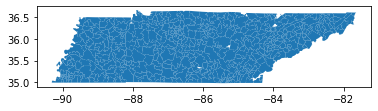

In [28]:
zipcodes.plot()

In [29]:
# Merge the data frame for the zip codes with the patient counts per zip code

zipcodes = pd.merge(left = zipcodes, right = zip_counts, 
                    left_on = 'ZCTA5CE10', right_index = True)
zipcodes.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,CallReportNum
0,47,37710.0,4737710,B5,G6350,S,211712025,0,+36.1586321,-084.3161341,N,"POLYGON ((-84.27434 36.13099, -84.27447 36.130...",1
1,47,37381.0,4737381,B5,G6350,S,360489702,38482384,+35.6871804,-084.8769930,N,"POLYGON ((-84.80164 35.76971, -84.80163 35.769...",9
2,47,37701.0,4737701,B5,G6350,S,27309005,28530,+35.7927401,-083.9860671,N,"POLYGON ((-83.98049 35.82693, -83.98045 35.826...",8
3,47,37886.0,4737886,B5,G6350,S,113625372,0,+35.7455878,-083.8047184,N,"POLYGON ((-83.89972 35.67276, -83.89920 35.672...",3
4,47,37757.0,4737757,B5,G6350,S,72942123,8907166,+36.2990089,-084.1372987,N,"MULTIPOLYGON (((-84.15754 36.35430, -84.15683 ...",3


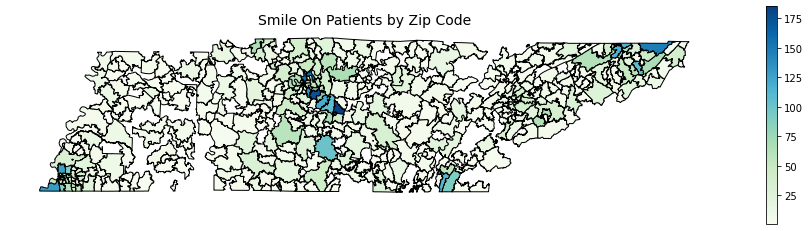

In [30]:
# Time to plot!

fig, ax = plt.subplots(figsize=(16,4))
zipcodes.plot(column = 'CallReportNum', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Smile On Patients by Zip Code', fontsize = 14)
ax.axis('off');

### Create a chloropleth map with patients by county

In [31]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [32]:
counties = gpd.read_file('data/county/tncounty.shp')

In [33]:
counties.head()
countynames = counties.NAME.value_counts()
countynames.head()

Lincoln      1
Franklin     1
Humphreys    1
Weakley      1
Jackson      1
Name: NAME, dtype: int64

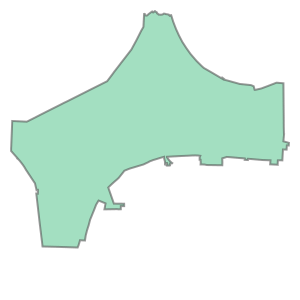

In [34]:
counties.loc[0, 'geometry']

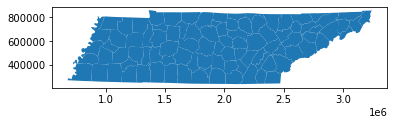

In [35]:
counties.plot();

In [36]:
first.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
40023,53396598,SMILE ON 60+ Clinical,NaN,2018-05-31 14:26:00,5/31/2018 14:27,1,-2,116749,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40031,70839903,SMILE ON 60+ Clinical,NaN,2018-02-14 08:10:00,2/14/2018 8:18,8,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,80389848,SMILE ON 60+ Clinical,NaN,2020-10-30 11:39:00,10/30/2020 11:39,0,2061444,60132,NaN,NaN,...,NaN,NaN,Church Health Center - Memphis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40021,53601932,SMILE ON 60+ Clinical,NaN,2018-06-08 08:14:00,6/8/2018 8:21,7,2307186,116749,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Interfaith Dental Clinic - Murfreesboro,Senior Center,NaN,NaN,NaN,NaN,Yes,Yes
40007,55628771,SMILE ON 60+ Clinical,NaN,2018-08-01 08:53:00,8/1/2018 8:54,1,2384106,118821,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Group by county and count how many patients are in each one
county_grouped = first.groupby(['CountyName'])

county_counts = county_grouped.count()['CallReportNum']
                        
county_counts.head()

CountyName
Anderson     17
Bedford     115
Benton       11
Bledsoe       5
Blount       86
Name: CallReportNum, dtype: int64

In [38]:
# Convert to a data frame
county_counts = county_counts.to_frame()
county_counts.head()

,CallReportNum
CountyName,
Anderson,17
Bedford,115
Benton,11
Bledsoe,5
Blount,86


In [39]:
counties = pd.merge(left = counties, right = county_counts, 
                    left_on = 'NAME', right_on = 'CountyName')
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,CallReportNum
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",6
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",18
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",40
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",43
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",24


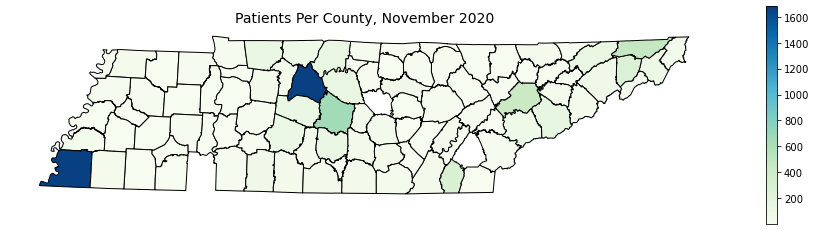

In [40]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'CallReportNum', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Patients Per County, November 2020', fontsize = 14)
ax.axis('off');

### Which facilities have the highest rate of completion for the following questions
- SMILE ON 60+ Treatment Plan - Is the treatment plan completed?	
- SMILE ON 60+ Treatment Plan - Was a treatment plan developed?	
- SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)

In [41]:
# look at records with a clinic location: SMILE ON 60+ Site Information - Enroller ID
smile_clinic = smile[~smile['SMILE ON 60+ Site Information - Enroller ID'].isnull()]

smile_clinic.shape
smile_clinic.tail()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
5,81371535,SMILE ON 60+ Clinical,NaN,2020-11-25 13:04:00,11/25/2020 13:04,0,3605119,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,No,Yes,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,2020-11-25 13:50:00,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes
3,81375215,SMILE ON 60+ Clinical,NaN,2020-11-25 14:17:00,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,2020-11-25 15:02:00,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
0,81381827,SMILE ON 60+ Registration,NaN,2020-11-25 16:46:00,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Group by clinic location and count how many patient records are in each one
clinic_grouped = smile_clinic.groupby(['SMILE ON 60+ Site Information - Enroller ID'])

clinic_counts = clinic_grouped.count()['CallReportNum']
                        
clinic_counts.head()

SMILE ON 60+ Site Information - Enroller ID
Appalachian Miles for Smiles - Mobile             206
Christ Community Health Services- Broad Avenue    777
Christ Community Health Services- Frayser         910
Christ Community Health Services- Hickory Hill    986
Christ Community Health Services- Raleigh         611
Name: CallReportNum, dtype: int64

In [43]:
# Convert to a data frame
clinic_counts = clinic_counts.to_frame()
clinic_counts.head()

,CallReportNum
SMILE ON 60+ Site Information - Enroller ID,
Appalachian Miles for Smiles - Mobile,206
Christ Community Health Services- Broad Avenue,777
Christ Community Health Services- Frayser,910
Christ Community Health Services- Hickory Hill,986
Christ Community Health Services- Raleigh,611


In [44]:
# Group by clinic location and count how many answered the first question
#clinic_grouped = smile_clinic.groupby(['SMILE ON 60+ Site Information - Enroller ID'])

q_one_counts = clinic_grouped.count()['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?']
                        
q_one_counts = q_one_counts.to_frame()
q_one_counts.head()

,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?
SMILE ON 60+ Site Information - Enroller ID,
Appalachian Miles for Smiles - Mobile,103
Christ Community Health Services- Broad Avenue,566
Christ Community Health Services- Frayser,209
Christ Community Health Services- Hickory Hill,688
Christ Community Health Services- Raleigh,268


In [45]:
# Group by clinic location and count how many answered the first question
#clinic_grouped = smile_clinic.groupby(['SMILE ON 60+ Site Information - Enroller ID'])

q_two_counts = clinic_grouped.count()['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?']

q_two_counts = q_two_counts.to_frame()                        
q_two_counts.head()

,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?
SMILE ON 60+ Site Information - Enroller ID,
Appalachian Miles for Smiles - Mobile,110
Christ Community Health Services- Broad Avenue,447
Christ Community Health Services- Frayser,202
Christ Community Health Services- Hickory Hill,695
Christ Community Health Services- Raleigh,247


In [46]:
# Group by clinic location and count how many answered the first question
#clinic_grouped = smile_clinic.groupby(['SMILE ON 60+ Site Information - Enroller ID'])

q_three_counts = clinic_grouped.count()['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']

q_three_counts = q_three_counts.to_frame()
q_three_counts.head()

,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
SMILE ON 60+ Site Information - Enroller ID,
Appalachian Miles for Smiles - Mobile,32
Christ Community Health Services- Broad Avenue,390
Christ Community Health Services- Frayser,143
Christ Community Health Services- Hickory Hill,670
Christ Community Health Services- Raleigh,209


In [47]:
clinic_counts = pd.merge(left = clinic_counts, right = q_one_counts, 
                    on = 'SMILE ON 60+ Site Information - Enroller ID')
clinic_counts.head()

,CallReportNum,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?
SMILE ON 60+ Site Information - Enroller ID,,
Appalachian Miles for Smiles - Mobile,206,103
Christ Community Health Services- Broad Avenue,777,566
Christ Community Health Services- Frayser,910,209
Christ Community Health Services- Hickory Hill,986,688
Christ Community Health Services- Raleigh,611,268


In [48]:
clinic_counts = pd.merge(left = clinic_counts, right = q_two_counts, 
                    on = 'SMILE ON 60+ Site Information - Enroller ID')
clinic_counts.head()

,CallReportNum,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?
SMILE ON 60+ Site Information - Enroller ID,,,
Appalachian Miles for Smiles - Mobile,206,103,110
Christ Community Health Services- Broad Avenue,777,566,447
Christ Community Health Services- Frayser,910,209,202
Christ Community Health Services- Hickory Hill,986,688,695
Christ Community Health Services- Raleigh,611,268,247


In [49]:
clinic_counts = pd.merge(left = clinic_counts, right = q_three_counts, 
                    on = 'SMILE ON 60+ Site Information - Enroller ID')
clinic_counts.head()

,CallReportNum,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
SMILE ON 60+ Site Information - Enroller ID,,,,
Appalachian Miles for Smiles - Mobile,206,103,110,32
Christ Community Health Services- Broad Avenue,777,566,447,390
Christ Community Health Services- Frayser,910,209,202,143
Christ Community Health Services- Hickory Hill,986,688,695,670
Christ Community Health Services- Raleigh,611,268,247,209


In [50]:
clinic_counts['answers'] = clinic_counts['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?'] + clinic_counts['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?'] + clinic_counts['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']

clinic_counts.head()

,CallReportNum,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",answers
SMILE ON 60+ Site Information - Enroller ID,,,,,
Appalachian Miles for Smiles - Mobile,206,103,110,32,245
Christ Community Health Services- Broad Avenue,777,566,447,390,1403
Christ Community Health Services- Frayser,910,209,202,143,554
Christ Community Health Services- Hickory Hill,986,688,695,670,2053
Christ Community Health Services- Raleigh,611,268,247,209,724


In [51]:
clinic_counts['questions'] = clinic_counts['CallReportNum'] * 3
clinic_counts.head()

,CallReportNum,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",answers,questions
SMILE ON 60+ Site Information - Enroller ID,,,,,,
Appalachian Miles for Smiles - Mobile,206,103,110,32,245,618
Christ Community Health Services- Broad Avenue,777,566,447,390,1403,2331
Christ Community Health Services- Frayser,910,209,202,143,554,2730
Christ Community Health Services- Hickory Hill,986,688,695,670,2053,2958
Christ Community Health Services- Raleigh,611,268,247,209,724,1833


In [52]:
clinic_counts['Answer Completion Rate'] = round(clinic_counts['answers'] / clinic_counts['questions'] * 100)
clinic_counts.head()

,CallReportNum,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",answers,questions,Answer Completion Rate
SMILE ON 60+ Site Information - Enroller ID,,,,,,,
Appalachian Miles for Smiles - Mobile,206,103,110,32,245,618,40.0
Christ Community Health Services- Broad Avenue,777,566,447,390,1403,2331,60.0
Christ Community Health Services- Frayser,910,209,202,143,554,2730,20.0
Christ Community Health Services- Hickory Hill,986,688,695,670,2053,2958,69.0
Christ Community Health Services- Raleigh,611,268,247,209,724,1833,39.0


In [53]:
answer_completion = clinic_counts.sort_values(by=['Answer Completion Rate'], ascending=False)
answer_completion.head(35)

,CallReportNum,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",answers,questions,Answer Completion Rate
SMILE ON 60+ Site Information - Enroller ID,,,,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,2516,1902,1928,1831,5661,7548,75.0
Friends in Need Health Center - Kingsport,1566,1270,1279,839,3388,4698,72.0
Christ Community Health Services- Hickory Hill,986,688,695,670,2053,2958,69.0
Interfaith Health Clinic of Knoxville - Knoxville,1822,1248,1099,1070,3417,5466,63.0
Matthew Walker - Clarksville,658,415,420,415,1250,1974,63.0
Church Health Center - Memphis,3581,2765,2420,1322,6507,10743,61.0
Keystone Dental Care Inc. - Johnson City,1032,684,699,518,1901,3096,61.0
Smiles Inc. - South Pittsburg - serving Marion Grundy Franklin and Hamilton Counties,276,174,187,139,500,828,60.0
Christ Community Health Services- Broad Avenue,777,566,447,390,1403,2331,60.0


In [54]:
answer_stack = answer_completion[['answers', 'questions', 'Answer Completion Rate']]
answer_stack.head()

,answers,questions,Answer Completion Rate
SMILE ON 60+ Site Information - Enroller ID,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,5661,7548,75.0
Friends in Need Health Center - Kingsport,3388,4698,72.0
Christ Community Health Services- Hickory Hill,2053,2958,69.0
Interfaith Health Clinic of Knoxville - Knoxville,3417,5466,63.0
Matthew Walker - Clarksville,1250,1974,63.0


In [55]:
answer_stack['completed'] = 'Y'
answer_stack.head()

<ipython-input-55-c9527c115261>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_stack['completed'] = 'Y'


,answers,questions,Answer Completion Rate,completed
SMILE ON 60+ Site Information - Enroller ID,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,5661,7548,75.0,Y
Friends in Need Health Center - Kingsport,3388,4698,72.0,Y
Christ Community Health Services- Hickory Hill,2053,2958,69.0,Y
Interfaith Health Clinic of Knoxville - Knoxville,3417,5466,63.0,Y
Matthew Walker - Clarksville,1250,1974,63.0,Y


In [56]:
answer_stack2 = answer_stack.copy()
answer_stack2['completed'] = 'N'

answer_stack2.head()

,answers,questions,Answer Completion Rate,completed
SMILE ON 60+ Site Information - Enroller ID,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,5661,7548,75.0,N
Friends in Need Health Center - Kingsport,3388,4698,72.0,N
Christ Community Health Services- Hickory Hill,2053,2958,69.0,N
Interfaith Health Clinic of Knoxville - Knoxville,3417,5466,63.0,N
Matthew Walker - Clarksville,1250,1974,63.0,N


In [57]:
answer_stack.head()

,answers,questions,Answer Completion Rate,completed
SMILE ON 60+ Site Information - Enroller ID,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,5661,7548,75.0,Y
Friends in Need Health Center - Kingsport,3388,4698,72.0,Y
Christ Community Health Services- Hickory Hill,2053,2958,69.0,Y
Interfaith Health Clinic of Knoxville - Knoxville,3417,5466,63.0,Y
Matthew Walker - Clarksville,1250,1974,63.0,Y


In [58]:
answer_stack2['no_answer'] = answer_stack2['questions'] - answer_stack2['answers'] 
answer_stack2.head()

,answers,questions,Answer Completion Rate,completed,no_answer
SMILE ON 60+ Site Information - Enroller ID,,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,5661,7548,75.0,N,1887
Friends in Need Health Center - Kingsport,3388,4698,72.0,N,1310
Christ Community Health Services- Hickory Hill,2053,2958,69.0,N,905
Interfaith Health Clinic of Knoxville - Knoxville,3417,5466,63.0,N,2049
Matthew Walker - Clarksville,1250,1974,63.0,N,724


In [59]:
answer_stack2['answers'] = answer_stack2['no_answer']
answer_stack2.head()

,answers,questions,Answer Completion Rate,completed,no_answer
SMILE ON 60+ Site Information - Enroller ID,,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,1887,7548,75.0,N,1887
Friends in Need Health Center - Kingsport,1310,4698,72.0,N,1310
Christ Community Health Services- Hickory Hill,905,2958,69.0,N,905
Interfaith Health Clinic of Knoxville - Knoxville,2049,5466,63.0,N,2049
Matthew Walker - Clarksville,724,1974,63.0,N,724


In [60]:
del answer_stack2['no_answer']
answer_stack2.head()

,answers,questions,Answer Completion Rate,completed
SMILE ON 60+ Site Information - Enroller ID,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,1887,7548,75.0,N
Friends in Need Health Center - Kingsport,1310,4698,72.0,N
Christ Community Health Services- Hickory Hill,905,2958,69.0,N
Interfaith Health Clinic of Knoxville - Knoxville,2049,5466,63.0,N
Matthew Walker - Clarksville,724,1974,63.0,N


In [61]:
answer_stack.head()

,answers,questions,Answer Completion Rate,completed
SMILE ON 60+ Site Information - Enroller ID,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,5661,7548,75.0,Y
Friends in Need Health Center - Kingsport,3388,4698,72.0,Y
Christ Community Health Services- Hickory Hill,2053,2958,69.0,Y
Interfaith Health Clinic of Knoxville - Knoxville,3417,5466,63.0,Y
Matthew Walker - Clarksville,1250,1974,63.0,Y


In [62]:
answer_stack2.head()

,answers,questions,Answer Completion Rate,completed
SMILE ON 60+ Site Information - Enroller ID,,,,
Matthew Walker Comprehensive Health Center Inc. - Nashville,1887,7548,75.0,N
Friends in Need Health Center - Kingsport,1310,4698,72.0,N
Christ Community Health Services- Hickory Hill,905,2958,69.0,N
Interfaith Health Clinic of Knoxville - Knoxville,2049,5466,63.0,N
Matthew Walker - Clarksville,724,1974,63.0,N


In [63]:
answer_stack = answer_stack.append(answer_stack2)
answer_stack.shape

(62, 4)

In [64]:
answer_stack['completed'].value_counts()

N    31
Y    31
Name: completed, dtype: int64

In [65]:
answer_stack.to_csv(r'answer_stack.csv', index = True)

In [66]:
drink = pd.read_csv('data/adult_drinking_2019.csv')
drink.head()

,County,County Value,Error Margin,Z-Score
0,Anderson,14%,13-14%,0.00
1,Bedford,15%,14-15%,0.68
2,Benton,12%,12-13%,-1.23
3,Bledsoe,14%,13-15%,0.13
4,Blount,14%,13-15%,0.32


In [67]:
drink = drink[['County', 'County Value']]
drink.head()

,County,County Value
0,Anderson,14%
1,Bedford,15%
2,Benton,12%
3,Bledsoe,14%
4,Blount,14%


In [68]:
drink.sort_values('County Value', inplace=True, ascending = False)

drink = drink.reset_index()
drink.head()

,index,County,County Value
0,74,Rutherford,18%
1,18,Davidson,18%
2,46,Knox,17%
3,62,Montgomery,17%
4,94,Wilson,17%


In [69]:
drink = drink[['County', 'County Value']]
drink.tail()

,County,County Value
90,Cocke,12%
91,Pickett,12%
92,Fentress,12%
93,Perry,12%
94,Haywood,11%


In [70]:
drink['County'] = drink['County'].str.lower()
drink.head(2)

,County,County Value
0,rutherford,18%
1,davidson,18%


In [71]:
pop = pd.read_csv('data/tn_pop_county.csv')
pop.head()

,NAME,population
0,Anderson County,"76,978"
1,Bedford County,"49,713"
2,Benton County,"16,160"
3,Bledsoe County,"15,064"
4,Blount County,"133,088"


In [72]:
pop['NAME'] = pop['NAME'].str.replace(' County','')
pop.head(2)

,NAME,population
0,Anderson,"76,978"
1,Bedford,"49,713"


In [73]:
pop['NAME'] = pop['NAME'].str.lower()
pop.head(2)

,NAME,population
0,anderson,"76,978"
1,bedford,"49,713"


In [74]:
drink = pd.merge(left = drink, right = pop,
                 left_on = 'County', right_on = 'NAME')
drink.head(5)

,County,County Value,NAME,population
0,rutherford,18%,rutherford,"332,285"
1,davidson,18%,davidson,"694,144"
2,knox,17%,knox,"470,313"
3,montgomery,17%,montgomery,"208,993"
4,wilson,17%,wilson,"144,657"


In [75]:
drink = drink[['County', 'County Value', 'population']]
drink.head()

,County,County Value,population
0,rutherford,18%,"332,285"
1,davidson,18%,"694,144"
2,knox,17%,"470,313"
3,montgomery,17%,"208,993"
4,wilson,17%,"144,657"


In [76]:
drink['County Value'] = drink['County Value'].str.replace('%', '')
drink.head()

,County,County Value,population
0,rutherford,18,"332,285"
1,davidson,18,"694,144"
2,knox,17,"470,313"
3,montgomery,17,"208,993"
4,wilson,17,"144,657"


In [77]:
drink['County Value'] = drink['County Value'].astype(int)
drink.head()

,County,County Value,population
0,rutherford,18,"332,285"
1,davidson,18,"694,144"
2,knox,17,"470,313"
3,montgomery,17,"208,993"
4,wilson,17,"144,657"


In [78]:
drink['County Value'] = drink['County Value']/100
drink.head()

,County,County Value,population
0,rutherford,0.18,"332,285"
1,davidson,0.18,"694,144"
2,knox,0.17,"470,313"
3,montgomery,0.17,"208,993"
4,wilson,0.17,"144,657"


In [79]:
drink['population'] = drink['population'].str.replace(',', '')
drink.head()

,County,County Value,population
0,rutherford,0.18,332285
1,davidson,0.18,694144
2,knox,0.17,470313
3,montgomery,0.17,208993
4,wilson,0.17,144657


In [80]:
drink['population'] = drink['population'].astype(int)
drink.head()

,County,County Value,population
0,rutherford,0.18,332285
1,davidson,0.18,694144
2,knox,0.17,470313
3,montgomery,0.17,208993
4,wilson,0.17,144657


In [81]:
drink['drink pop'] = round(drink['County Value'] * drink['population'])
drink.head()

,County,County Value,population,drink pop
0,rutherford,0.18,332285,59811.0
1,davidson,0.18,694144,124946.0
2,knox,0.17,470313,79953.0
3,montgomery,0.17,208993,35529.0
4,wilson,0.17,144657,24592.0


In [82]:
drink['drink pop'] = drink['drink pop'].astype(int)
drink.head()

,County,County Value,population,drink pop
0,rutherford,0.18,332285,59811
1,davidson,0.18,694144,124946
2,knox,0.17,470313,79953
3,montgomery,0.17,208993,35529
4,wilson,0.17,144657,24592


In [83]:
drink.dtypes

County           object
County Value    float64
population        int32
drink pop         int32
dtype: object

In [116]:
drink.to_csv(r'drink.csv', index = True)

In [123]:
smoke = pd.read_csv('data/adult_smoking_2019.csv')
smoke.head()

,County,County Value
0,Anderson,21%
1,Bedford,21%
2,Benton,23%
3,Bledsoe,26%
4,Blount,19%


In [124]:
smoke = smoke[['County', 'County Value']]
smoke.head()

,County,County Value
0,Anderson,21%
1,Bedford,21%
2,Benton,23%
3,Bledsoe,26%
4,Blount,19%


In [125]:
smoke['County Value'] = smoke['County Value'].str.replace('%','')
smoke.head()

,County,County Value
0,Anderson,21
1,Bedford,21
2,Benton,23
3,Bledsoe,26
4,Blount,19


In [126]:
smoke['County Value'] = smoke['County Value'].astype(int)
smoke.dtypes

County          object
County Value     int32
dtype: object

In [127]:
smoke['County Value'] = smoke['County Value']/100
smoke.head()

,County,County Value
0,Anderson,0.21
1,Bedford,0.21
2,Benton,0.23
3,Bledsoe,0.26
4,Blount,0.19


In [128]:
smoke['County'] = smoke['County'].str.lower()
smoke.head(2)

,County,County Value
0,anderson,0.21
1,bedford,0.21


In [129]:
smoke = pd.merge(left = smoke, right = pop,
                left_on = 'County', right_on = 'NAME')
smoke.head()

,County,County Value,NAME,population
0,anderson,0.21,anderson,"76,978"
1,bedford,0.21,bedford,"49,713"
2,benton,0.23,benton,"16,160"
3,bledsoe,0.26,bledsoe,"15,064"
4,blount,0.19,blount,"133,088"


In [130]:
smoke = smoke[['County', 'County Value', 'population']]
smoke.head(2)

,County,County Value,population
0,anderson,0.21,"76,978"
1,bedford,0.21,"49,713"


In [131]:
smoke['population'] = smoke['population'].str.replace(',', '')
smoke.head(2)

,County,County Value,population
0,anderson,0.21,76978
1,bedford,0.21,49713


In [132]:
smoke['population'] = smoke['population'].astype(int)
smoke.head()

,County,County Value,population
0,anderson,0.21,76978
1,bedford,0.21,49713
2,benton,0.23,16160
3,bledsoe,0.26,15064
4,blount,0.19,133088


In [133]:
smoke['smoke_pop'] = smoke['County Value'] * smoke['population']
smoke.head(2)

,County,County Value,population,smoke_pop
0,anderson,0.21,76978,16165.38
1,bedford,0.21,49713,10439.73


In [134]:
smoke['smoke_pop'] = round(smoke['smoke_pop'])
smoke.head(2)

,County,County Value,population,smoke_pop
0,anderson,0.21,76978,16165.0
1,bedford,0.21,49713,10440.0


In [135]:
smoke['smoke_pop'] = smoke['smoke_pop'].astype(int)
smoke.head(2)

,County,County Value,population,smoke_pop
0,anderson,0.21,76978,16165
1,bedford,0.21,49713,10440


In [136]:
smoke.to_csv(r'smoke.csv', index = True)

In [120]:
obese = pd.read_csv('obese.csv')
obese.head(2)

,County,County Value,population,obese_pop
0,Anderson,32%,76978,24633
1,Bedford,33%,49713,16405


In [121]:
obese['County'] = obese['County'].str.lower()
obese.head(2)

,County,County Value,population,obese_pop
0,anderson,32%,76978,24633
1,bedford,33%,49713,16405


In [147]:
obese['County Value'] = obese['County Value'].str.replace('%','')
obese.head(2)

,County,County Value,population,obese_pop
0,anderson,32,76978,24633
1,bedford,33,49713,16405


In [148]:
obese['County Value'] = obese['County Value'].astype(int)/100
obese.head(2)

,County,County Value,population,obese_pop
0,anderson,0.32,76978,24633
1,bedford,0.33,49713,16405


In [145]:
inactive = pd.read_csv('inactive.csv')
inactive.head(2)

,County,population,County Value,inactive_pop
0,Anderson,76978,0.28,21554
1,Bedford,49713,0.33,16405


In [146]:
inactive['County'] = inactive['County'].str.lower()
inactive.head(2)

,County,population,County Value,inactive_pop
0,anderson,76978,0.28,21554
1,bedford,49713,0.33,16405


In [150]:
bigfour = pd.merge(left = smoke, right = drink,
                  on = 'County')
bigfour.head()

,County,County Value_x,population_x,smoke_pop,County Value_y,population_y,drink pop
0,anderson,0.21,76978,16165,0.14,76978,10777
1,bedford,0.21,49713,10440,0.15,49713,7457
2,benton,0.23,16160,3717,0.12,16160,1939
3,bledsoe,0.26,15064,3917,0.14,15064,2109
4,blount,0.19,133088,25287,0.14,133088,18632


In [151]:
bigfour = pd.merge(left = bigfour, right = obese,
                  on = 'County')
bigfour.head()

,County,County Value_x,population_x,smoke_pop,County Value_y,population_y,drink pop,County Value,population,obese_pop
0,anderson,0.21,76978,16165,0.14,76978,10777,0.32,76978,24633
1,bedford,0.21,49713,10440,0.15,49713,7457,0.33,49713,16405
2,benton,0.23,16160,3717,0.12,16160,1939,0.35,16160,5656
3,bledsoe,0.26,15064,3917,0.14,15064,2109,0.35,15064,5272
4,blount,0.19,133088,25287,0.14,133088,18632,0.35,133088,46581


In [152]:
bigfour = bigfour[['County', 'population', 'County Value_x', 'smoke_pop', 'County Value_y', 'drink pop', 'County Value', 'obese_pop']]
bigfour.head(2)

,County,population,County Value_x,smoke_pop,County Value_y,drink pop,County Value,obese_pop
0,anderson,76978,0.21,16165,0.14,10777,0.32,24633
1,bedford,49713,0.21,10440,0.15,7457,0.33,16405


In [153]:
bigfour = bigfour.rename(columns={'population': 'Population', 'County Value_x': 'Smoker %', 'County Value_y': 'Drink %', 'County Value': 'Obese %', 'drink pop': 'drink_pop'})
bigfour.head()

,County,Population,Smoker %,smoke_pop,Drink %,drink_pop,Obese %,obese_pop
0,anderson,76978,0.21,16165,0.14,10777,0.32,24633
1,bedford,49713,0.21,10440,0.15,7457,0.33,16405
2,benton,16160,0.23,3717,0.12,1939,0.35,5656
3,bledsoe,15064,0.26,3917,0.14,2109,0.35,5272
4,blount,133088,0.19,25287,0.14,18632,0.35,46581


In [154]:
bigfour = pd.merge(left = bigfour, right = inactive,
                  on = 'County')
bigfour.head()

,County,Population,Smoker %,smoke_pop,Drink %,drink_pop,Obese %,obese_pop,population,County Value,inactive_pop
0,anderson,76978,0.21,16165,0.14,10777,0.32,24633,76978,0.28,21554
1,bedford,49713,0.21,10440,0.15,7457,0.33,16405,49713,0.33,16405
2,benton,16160,0.23,3717,0.12,1939,0.35,5656,16160,0.32,5171
3,bledsoe,15064,0.26,3917,0.14,2109,0.35,5272,15064,0.29,4369
4,blount,133088,0.19,25287,0.14,18632,0.35,46581,133088,0.26,34603


In [155]:
bigfour = bigfour.rename(columns={'County Value': 'Inactive %'})
bigfour.head()

,County,Population,Smoker %,smoke_pop,Drink %,drink_pop,Obese %,obese_pop,population,Inactive %,inactive_pop
0,anderson,76978,0.21,16165,0.14,10777,0.32,24633,76978,0.28,21554
1,bedford,49713,0.21,10440,0.15,7457,0.33,16405,49713,0.33,16405
2,benton,16160,0.23,3717,0.12,1939,0.35,5656,16160,0.32,5171
3,bledsoe,15064,0.26,3917,0.14,2109,0.35,5272,15064,0.29,4369
4,blount,133088,0.19,25287,0.14,18632,0.35,46581,133088,0.26,34603


In [157]:
bigfour = bigfour.drop(columns = 'population')
bigfour.head(2)

,County,Population,Smoker %,smoke_pop,Drink %,drink_pop,Obese %,obese_pop,Inactive %,inactive_pop
0,anderson,76978,0.21,16165,0.14,10777,0.32,24633,0.28,21554
1,bedford,49713,0.21,10440,0.15,7457,0.33,16405,0.33,16405


In [158]:
bigfour.to_csv(r'bigfour.csv')